In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame

%matplotlib inline

In [3]:
load_dotenv()

True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [5]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-10-31', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-10-31', tz='America/New_York').isoformat()

In [6]:
# Get 5 years' worth of historical data for "Heavy Hitters" AAPL, MSFT, GOOG, GOOGL, AMZN, META, SPY
# Set timeframe to "1Day"
timeframe = "1Day"


# Set the ticker information
tickers = ["AAPL","MSFT","GOOG","GOOGL","AMZN","META","SPY"]


hh_5_year = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

hh_5_year

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-10-31 04:00:00+00:00,167.900,169.6499,166.940,169.04,36070445,199384,168.609022,AAPL
2017-11-01 04:00:00+00:00,169.870,169.9400,165.610,166.89,33638072,209941,167.188415,AAPL
2017-11-02 04:00:00+00:00,167.640,168.5000,165.280,168.11,41394328,249912,168.444532,AAPL
2017-11-03 04:00:00+00:00,174.000,174.2600,171.120,172.50,59402471,336014,172.719018,AAPL
2017-11-06 05:00:00+00:00,172.365,174.9900,171.720,174.25,35026850,194183,173.981439,AAPL
...,...,...,...,...,...,...,...,...
2022-10-25 04:00:00+00:00,378.790,385.2500,378.671,384.92,78656471,598158,382.991850,SPY
2022-10-26 04:00:00+00:00,381.620,387.5800,381.350,382.02,103779972,657066,383.877161,SPY
2022-10-27 04:00:00+00:00,383.070,385.0000,379.330,379.98,81650038,599316,381.339490,SPY


In [7]:
# Reorganize the DataFrame
# Separate ticker data
AAPL = hh_5_year[hh_5_year['symbol']=='AAPL'].drop('symbol', axis=1)
MSFT = hh_5_year[hh_5_year['symbol']=='MSFT'].drop('symbol',axis=1)
GOOG = hh_5_year[hh_5_year['symbol']=='GOOG'].drop('symbol',axis=1)
GOOGL =hh_5_year[hh_5_year['symbol']=='GOOGL'].drop('symbol',axis=1)
AMZN = hh_5_year[hh_5_year['symbol']=='AMZN'].drop('symbol', axis=1)
META = hh_5_year[hh_5_year['symbol']=='META'].drop('symbol', axis=1)
SPY=hh_5_year[hh_5_year['symbol']=='SPY'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
hh_5_year = pd.concat([AAPL, MSFT,GOOG,GOOGL,AMZN,META,SPY],axis=1, keys=['AAPL','MSFT','GOOG','GOOGL','AMZN','META','SPY'])


# Display sample data
hh_5_year.head(10)

AAPL                                      \
                              open      high     low   close    volume   
timestamp                                                                
2017-10-31 04:00:00+00:00  167.900  169.6499  166.94  169.04  36070445   
2017-11-01 04:00:00+00:00  169.870  169.9400  165.61  166.89  33638072   
2017-11-02 04:00:00+00:00  167.640  168.5000  165.28  168.11  41394328   
2017-11-03 04:00:00+00:00  174.000  174.2600  171.12  172.50  59402471   
2017-11-06 05:00:00+00:00  172.365  174.9900  171.72  174.25  35026850   
2017-11-07 05:00:00+00:00  173.910  175.2500  173.60  174.81  24614898   
2017-11-08 05:00:00+00:00  174.660  176.2400  174.33  176.24  24410342   
2017-11-09 05:00:00+00:00  175.110  176.0950  173.14  175.88  29984729   
2017-11-10 05:00:00+00:00  175.110  175.3800  174.27  174.67  25145721   
2017-11-13 05:00:00+00:00  173.510  174.5000  173.40  173.97  17009480   

                                                    MSFT                   \
                          trade_count        vwap   open    high      low   
timestamp                                                                   
2017-10-31 04:00:00+00:00      199384  168.609022  84.36  84.360  83.1100   
2017-11-01 04:00:00+00:00      209941  167.188415  83.68  83.760  82.8800   
2017-11-02 04:00:00+00:00      249912  168.444532  83.35  84.460  83.1200   
2017-11-03 04:00:00+00:00      336014  172.719018  84.08  84.540  83.4000   
2017-11-06 05:00:00+00:00      194183  173.981439  84.20  84.700  84.0825   
2017-11-07 05:00:00+00:00      145916  174.621145  84.77  84.900  83.9300   
2017-11-08 05:00:00+00:00      135164  175.506000  84.14  84.610  83.8300   
2017-11-09 05:00:00+00:00      167083  175.082829  84.11  84.270  82.9000   
2017-11-10 05:00:00+00:00      114343  174.830655  83.79  84.095  83.2300   
2017-11-13 05:00:00+00:00      113812  174.031218  83.67  83.940  83.4600   

                           ...      META                             SPY  \
                           ...    volume trade_count        vwap    open   
timestamp                  ...                                             
2017-10-31 04:00:00+00:00  ...  20174231      139067  179.879978  257.18   
2017-11-01 04:00:00+00:00  ...  40920320      261019  182.207518  258.04   
2017-11-02 04:00:00+00:00  ...  35626323      226731  179.227273  257.41   
2017-11-03 04:00:00+00:00  ...  17832597      114335  178.427136  257.77   
2017-11-06 05:00:00+00:00  ...  13397211       85235  179.170643  258.30   
2017-11-07 05:00:00+00:00  ...  12953182       78179  179.930625  258.97   
2017-11-08 05:00:00+00:00  ...  10771541       61672  179.732469  258.47   
2017-11-09 05:00:00+00:00  ...  12610535       86626  178.273579  257.73   
2017-11-10 05:00:00+00:00  ...  11145189       69501  178.483679  257.73   
2017-11-13 05:00:00+00:00  ...   9523447       58475  178.553188  257.30   

                                                                              \
                               high      low     close    volume trade_count   
timestamp                                                                      
2017-10-31 04:00:00+00:00  257.4400  256.805  257.1200  60678916      162728   
2017-11-01 04:00:00+00:00  258.4300  257.070  257.5000  54263336      193085   
2017-11-02 04:00:00+00:00  257.7500  256.190  257.6200  56449535      217328   
2017-11-03 04:00:00+00:00  258.5000  257.300  258.4500  62908639      189765   
2017-11-06 05:00:00+00:00  259.0000  258.220  258.8100  54815449      130424   
2017-11-07 05:00:00+00:00  259.3500  258.090  258.7000  57515699      170176   
2017-11-08 05:00:00+00:00  259.2200  258.150  259.1100  50514789      160009   
2017-11-09 05:00:00+00:00  258.3900  256.360  258.1908  95115637      349621   
2017-11-10 05:00:00+00:00  258.2926  257.370  258.1000  59984662      176651   
2017-11-13 05:00:00+00:00  258.5900  257.270  258.3400  51392695      149087   

                                   

In [8]:
# Create and empty DataFrame for closing prices
hh_closing_prices = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
hh_closing_prices["AAPL"] = hh_5_year["AAPL"]["close"]
hh_closing_prices["MSFT"] = hh_5_year["MSFT"]["close"]
hh_closing_prices["GOOG"] = hh_5_year["GOOG"]["close"]
hh_closing_prices["GOOGL"] = hh_5_year["GOOGL"]["close"]
hh_closing_prices["AMZN"] = hh_5_year["AMZN"]["close"]
hh_closing_prices["META"] = hh_5_year["META"]["close"]
hh_closing_prices["SPY"] = hh_5_year["SPY"]["close"]
# Drop the time component of the date
hh_closing_prices.index = hh_closing_prices.index.date

# Display first 10 rows of closing prices
hh_closing_prices.head(10)

,AAPL,MSFT,GOOG,GOOGL,AMZN,META,SPY
2017-10-31,169.04,83.18,1016.64,1033.040,1105.28,180.06,257.1200
2017-11-01,166.89,83.18,1025.50,1042.595,1103.68,182.66,257.5000
2017-11-02,168.11,84.05,1025.58,1042.970,1094.22,178.92,257.6200
2017-11-03,172.50,84.14,1032.48,1049.990,1111.60,178.92,258.4500
2017-11-06,174.25,84.47,1025.90,1042.680,1120.66,180.17,258.8100
2017-11-07,174.81,84.27,1033.33,1052.390,1123.17,180.25,258.7000
2017-11-08,176.24,84.56,1039.85,1058.290,1132.88,179.56,259.1100
2017-11-09,175.88,84.09,1031.26,1047.720,1129.13,179.30,258.1908
2017-11-10,174.67,83.87,1028.07,1044.150,1125.35,178.46,258.1000
2017-11-13,173.97,83.93,1025.75,1041.200,1129.17,178.77,258.3400


In [9]:
# Display last 10 rows of closing prices
hh_closing_prices.tail()

,AAPL,MSFT,GOOG,GOOGL,AMZN,META,SPY
2022-10-25,152.34,250.66,104.93,104.48,120.60,137.51,384.92
2022-10-26,149.35,231.32,94.82,94.93,115.66,129.82,382.02
2022-10-27,144.80,226.75,92.60,92.22,110.96,97.94,379.98
2022-10-28,155.74,235.87,96.58,96.29,103.41,99.20,389.02
2022-10-31,153.34,232.13,94.66,94.51,102.44,93.16,386.21


In [10]:
# Slice Heavy Hitters Portfolio
hh_portfolio = hh_closing_prices[['AAPL','MSFT','GOOG','GOOGL','AMZN','META']].pct_change()

hh_portfolio

,AAPL,MSFT,GOOG,GOOGL,AMZN,META
2017-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-01,-0.012719,0.000000,0.008715,0.009249,-0.001448,0.014440
2017-11-02,0.007310,0.010459,0.000078,0.000360,-0.008571,-0.020475
2017-11-03,0.026114,0.001071,0.006728,0.006731,0.015883,0.000000
2017-11-06,0.010145,0.003922,-0.006373,-0.006962,0.008150,0.006986
...,...,...,...,...,...,...
2022-10-25,0.019338,0.013792,0.019035,0.019118,0.006510,0.060052
2022-10-26,-0.019627,-0.077156,-0.096350,-0.091405,-0.040962,-0.055923
2022-10-27,-0.030465,-0.019756,-0.023413,-0.028547,-0.040636,-0.245571
2022-10-28,0.075552,0.040221,0.042981,0.044134,-0.068043,0.012865


In [11]:
# Slice S&P 500 Portfolio and calculate return

sp500_portfolio = hh_closing_prices[['SPY']].pct_change()

sp500_portfolio



,SPY
2017-10-31,NaN
2017-11-01,0.001478
2017-11-02,0.000466
2017-11-03,0.003222
2017-11-06,0.001393
...,...
2022-10-25,0.015969
2022-10-26,-0.007534
2022-10-27,-0.005340
2022-10-28,0.023791


Conduct Quantitative Analysis for All Portfolios

Performance Analysis

In [12]:
# Calculate Daily Returns

hh_daily_return = hh_closing_prices.pct_change()

hh_daily_return

,AAPL,MSFT,GOOG,GOOGL,AMZN,META,SPY
2017-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-01,-0.012719,0.000000,0.008715,0.009249,-0.001448,0.014440,0.001478
2017-11-02,0.007310,0.010459,0.000078,0.000360,-0.008571,-0.020475,0.000466
2017-11-03,0.026114,0.001071,0.006728,0.006731,0.015883,0.000000,0.003222
2017-11-06,0.010145,0.003922,-0.006373,-0.006962,0.008150,0.006986,0.001393
...,...,...,...,...,...,...,...
2022-10-25,0.019338,0.013792,0.019035,0.019118,0.006510,0.060052,0.015969
2022-10-26,-0.019627,-0.077156,-0.096350,-0.091405,-0.040962,-0.055923,-0.007534
2022-10-27,-0.030465,-0.019756,-0.023413,-0.028547,-0.040636,-0.245571,-0.005340
2022-10-28,0.075552,0.040221,0.042981,0.044134,-0.068043,0.012865,0.023791


In [13]:
# Summary Statistics
hh_summary = hh_daily_return.describe()

hh_summary

,AAPL,MSFT,GOOG,GOOGL,AMZN,META,SPY
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,0.000622,0.001000,-0.000056,-0.000070,-0.000039,-0.000157,0.000410
std,0.029392,0.019160,0.033029,0.033042,0.034607,0.026635,0.013085
min,-0.741522,-0.147464,-0.951267,-0.951229,-0.949003,-0.263901,-0.107828
25%,-0.008482,-0.007879,-0.007531,-0.008034,-0.009587,-0.011466,-0.004892
50%,0.000922,0.001094,0.001072,0.000995,0.001367,0.000414,0.000921
75%,0.012291,0.010819,0.010690,0.010546,0.011398,0.013214,0.006888
max,0.119808,0.142268,0.104485,0.096202,0.135359,0.176138,0.086761


<AxesSubplot:>

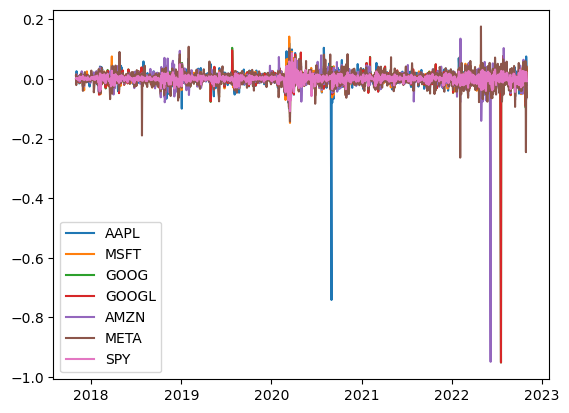

In [14]:
# Plot the daily returns
hh_return_plot = hh_daily_return.plot()

hh_return_plot

<AxesSubplot:ylabel='Density'>

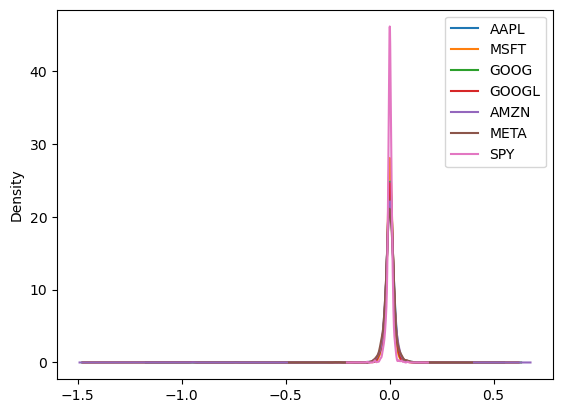

In [15]:
# Visualize the distribution of percent change in closing price
hh_daily_return.plot.density()

CALCULATE AND PLOT CUMULATIVE RETURNS OF ALL PORTFOLIOS

In [16]:
# Calculate Cumulative returns

hh_cumulative_returns = (1 + hh_daily_return).cumprod()

hh_cumulative_returns

,AAPL,MSFT,GOOG,GOOGL,AMZN,META,SPY
2017-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-01,0.987281,1.000000,1.008715,1.009249,0.998552,1.014440,1.001478
2017-11-02,0.994498,1.010459,1.008794,1.009612,0.989993,0.993669,1.001945
2017-11-03,1.020469,1.011541,1.015581,1.016408,1.005718,0.993669,1.005173
2017-11-06,1.030821,1.015509,1.009108,1.009332,1.013915,1.000611,1.006573
...,...,...,...,...,...,...,...
2022-10-25,0.901207,3.013465,0.103213,0.101138,0.109113,0.763690,1.497044
2022-10-26,0.883519,2.780957,0.093268,0.091894,0.104643,0.720982,1.485765
2022-10-27,0.856602,2.726016,0.091084,0.089271,0.100391,0.543930,1.477831
2022-10-28,0.921320,2.835658,0.094999,0.093210,0.093560,0.550927,1.512990


<AxesSubplot:>

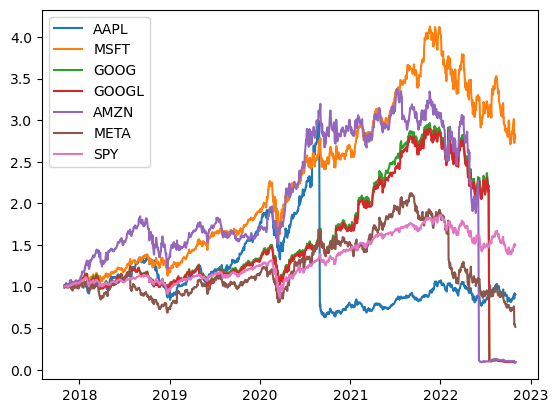

In [17]:
# Plot Cumulative returns

hh_cumulative_returns_plot = hh_cumulative_returns.plot()

hh_cumulative_returns_plot

Risk Analysis
Determine the risk of each portfolio:

Create a box plot for Heavy Hitters and S&P 500 portfolios
Calculate the standard deviation for Heavy Hitters and S&P500 portfolios
Determine whether Heavy Hitters portfolio is riskier than the S&P 500
Calculate the Annualized Standard Deviation

<AxesSubplot:>

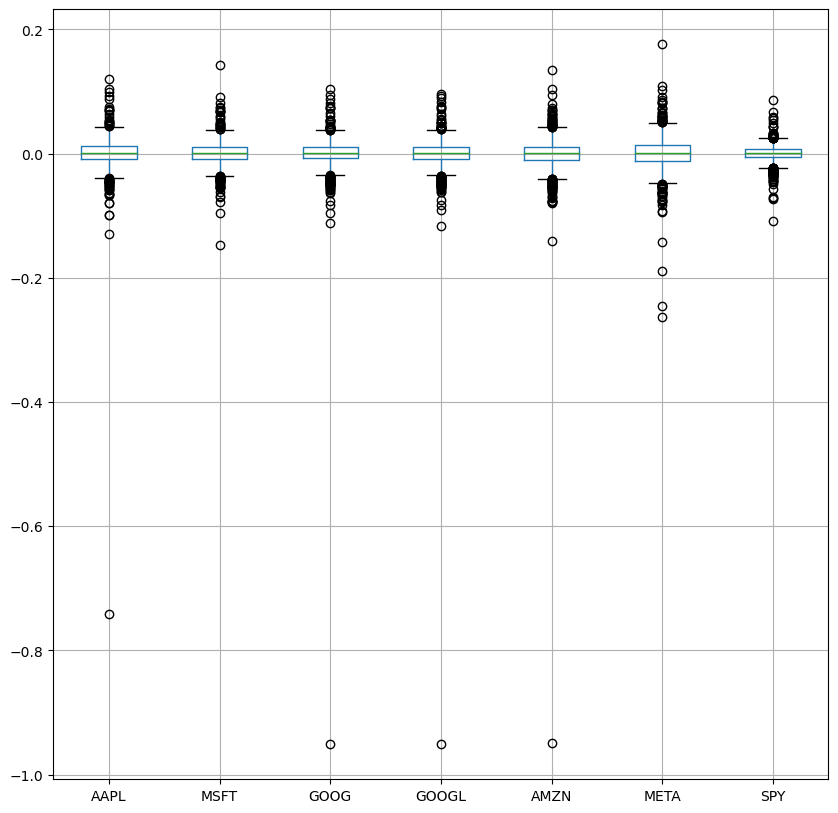

In [18]:
# Create boxplot for All Portfolio
hh_daily_return.boxplot(figsize=(10,10))

Calculate Standard Deviations and determine risks versus S&P 500

In [19]:
# Calculate the standard deviations 

hh_std = hh_daily_return.std()
hh_std = hh_std.sort_values(ascending = False)
hh_std

AMZN     0.034607
GOOGL    0.033042
GOOG     0.033029
AAPL     0.029392
META     0.026635
MSFT     0.019160
SPY      0.013085
dtype: float64

In [21]:
# Calculate the annualized standard deviation (252 trading days)
import numpy as np

annual_std = hh_std * np.sqrt(252)

annual_std

AMZN     0.549371
GOOGL    0.524532
GOOG     0.524323
AAPL     0.466587
META     0.422811
MSFT     0.304163
SPY      0.207713
dtype: float64

Based on our Analysis,the standard deviations results suggest The Heavy Hitters portfolio is riskier 
considering the tickers in the portfolio have a higher standard deviation compared to the S&P 500 index.

Rolling Statistics
Calculate and plot rolling std for Heavy Hitters Portfolio with 100-day window

In [22]:
# Calculate and plot the rolling standard deviation Heavy Hitters portfolio using a 100-day window
hh_100_rolling= hh_daily_return.rolling(window= 100).std()
hh_100_rolling

,AAPL,MSFT,GOOG,GOOGL,AMZN,META,SPY
2017-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-10-25,0.020772,0.020710,0.097790,0.097762,0.099201,0.032031,0.015624
2022-10-26,0.020499,0.022024,0.098156,0.098087,0.099239,0.032247,0.015560
2022-10-27,0.020725,0.022099,0.098109,0.098053,0.029411,0.040261,0.015563
2022-10-28,0.021991,0.022437,0.098251,0.098200,0.030143,0.040284,0.015721


<AxesSubplot:>

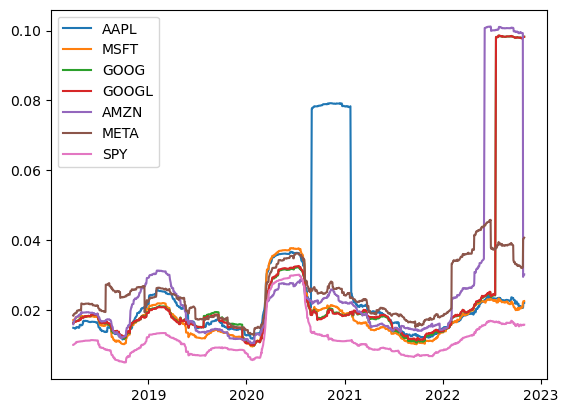

In [23]:
hh_100_rolling.plot()

Calculate and plot the correlation

<AxesSubplot:>

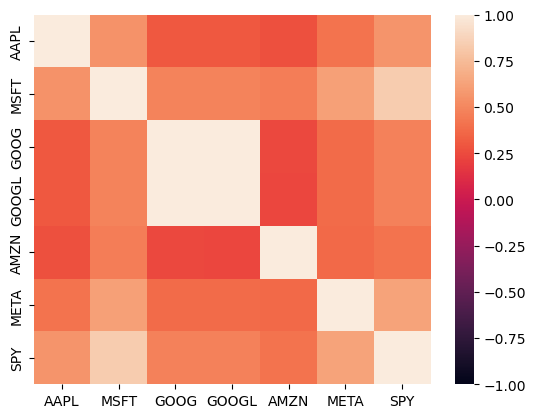

In [60]:
# Calculate the correlation
import seaborn as sns

hh_corr = hh_daily_return.corr()

# Display de correlation matrix
sns.heatmap(hh_corr, vmin=-1, vmax=1)

Calculate and Plot Beta for each ticker in Heavy Hitters portfolio and the S&P 500

In [25]:
# Calculate covariance of AAPL, MSFT, GOOG, GOOGL, AMZN, META
aapl_cov=hh_daily_return['AAPL'].cov(hh_daily_return['SPY'])
msft_cov=hh_daily_return['MSFT'].cov(hh_daily_return['SPY'])
goog_cov=hh_daily_return['GOOG'].cov(hh_daily_return['SPY'])
googl_cov=hh_daily_return['GOOGL'].cov(hh_daily_return['SPY'])
amzn_cov=hh_daily_return['AMZN'].cov(hh_daily_return['SPY'])
meta_cov=hh_daily_return['META'].cov(hh_daily_return['SPY'])


In [26]:
# Calculate variance of S&P 500
sp_500_var=hh_daily_return['SPY'].var()
sp_500_var

0.00017120976283168158

In [27]:
# Computing beta for AAPL
aapl_beta=aapl_cov/sp_500_var

aapl_beta

1.247429265464737

In [28]:
# Computing beta for MSFT
msft_beta=msft_cov/sp_500_var

msft_beta

1.2205642764788471

In [29]:
# Computing beta for GOOG
goog_beta=goog_cov/sp_500_var

goog_beta

1.1958940533659608

In [30]:
# Computing beta for GOOGL
googl_beta=googl_cov/sp_500_var

googl_beta

1.200238455629982

In [31]:
# Computing beta for AMZN
amzn_beta=amzn_cov/sp_500_var

amzn_beta

1.0942511725172055

In [32]:
# Computing beta for META
meta_beta=meta_cov/sp_500_var

meta_beta

1.274145363167806

Sharpe Ratios
Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

<AxesSubplot:>

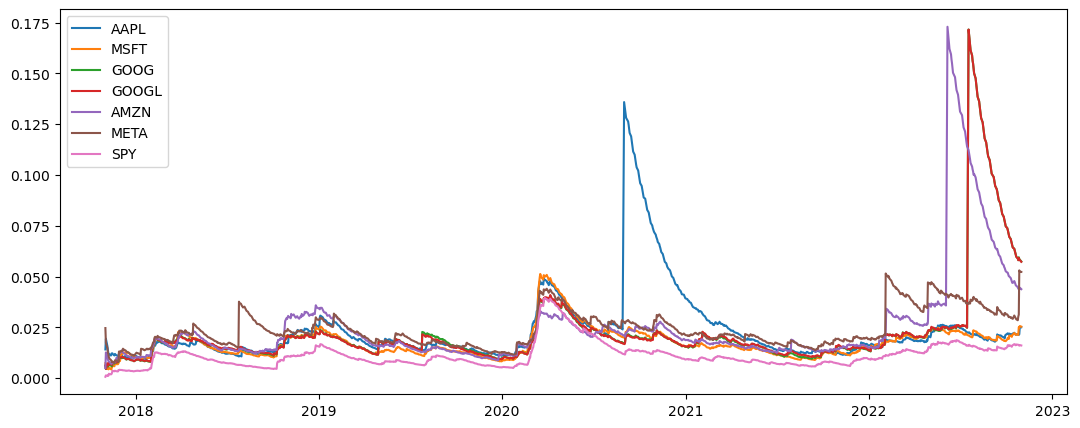

In [61]:
hh_daily_return.ewm(halflife=21).std().plot(figsize=(13,5))

In [33]:
# Annualized Sharpe Ratios
hh_sharp_ratio = ((hh_daily_return.mean() * 252) / (hh_daily_return.std() * np.sqrt(252)))
hh_sharp_ratio

AAPL     0.335878
MSFT     0.828435
GOOG    -0.026882
GOOGL   -0.033618
AMZN    -0.017765
META    -0.093453
SPY      0.496866
dtype: float64

<AxesSubplot:>

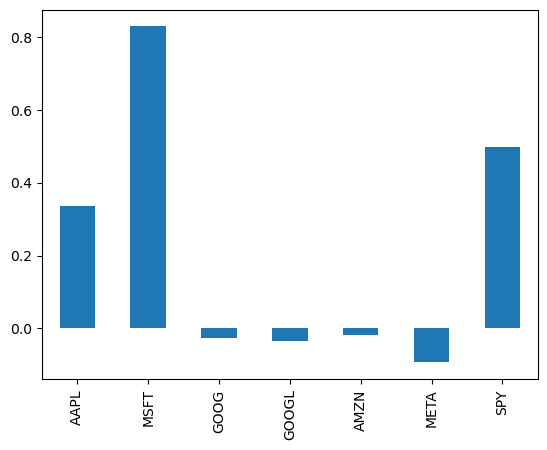

In [34]:
# Visualize the sharpe ratios as a bar plot
hh_sharp_ratio.plot(kind= "bar")

Calculate the weighted returns for the Heavy Hitters portfolio assuming an equal number of shares for each stock

In [35]:
# Calculate Portfolio returns with an equal amount of each stock
weights = [0.17, 0.17, 0.16, 0.16, 0.17, 0.17]

# Calculate portfolio return
hh_portfolio_returns = hh_portfolio.dot(weights)

# Display sample data
hh_portfolio_returns.head()

2017-10-31         NaN
2017-11-01    0.002921
2017-11-02   -0.001847
2017-11-03    0.009475
2017-11-06    0.002831
dtype: float64

In [36]:
#Calculate average return on Heavy Hitters portfolio return
hh_portfolio_returns.mean()

0.00022232263745845625

Calculate the weighted returns for the Heavy Hitters portfolio different number of shares for each stock

In [37]:
# Calculate Portfolio returns with an equal amount of each stock
weights = [0.30, 0.30, 0.10, 0.10, 0.10, 0.10]

# Calculate portfolio return
hh_portfolio_returns = hh_portfolio.dot(weights)

# Display sample data
hh_portfolio_returns.head()

2017-10-31        NaN
2017-11-01   -0.00072
2017-11-02    0.00247
2017-11-03    0.01109
2017-11-06    0.00440
dtype: float64

In [38]:
#Calculate average return on Heavy Hitters portfolio return
hh_portfolio_returns.mean()

0.00045439862893571813

Simulate five year Heavy Hitters portfolio growth using Monte Carlo Simulation

In [39]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [40]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-10-31', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-10-31', tz='America/New_York').isoformat()

In [41]:
# Get 5 years' worth of historical data for "Heavy Hitters" AAPL, MSFT, GOOG, GOOGL, AMZN, META
# Set timeframe to "1Day"
timeframe = "1Day"


# Set the ticker information
tickers = ["AAPL","MSFT","GOOG","GOOGL","AMZN","META"]


hh_5_year_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

hh_5_year_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-10-31 04:00:00+00:00,167.900,169.6499,166.94,169.04,36070445,199384,168.609022,AAPL
2017-11-01 04:00:00+00:00,169.870,169.9400,165.61,166.89,33638072,209941,167.188415,AAPL
2017-11-02 04:00:00+00:00,167.640,168.5000,165.28,168.11,41394328,249912,168.444532,AAPL
2017-11-03 04:00:00+00:00,174.000,174.2600,171.12,172.50,59402471,336014,172.719018,AAPL
2017-11-06 05:00:00+00:00,172.365,174.9900,171.72,174.25,35026850,194183,173.981439,AAPL
...,...,...,...,...,...,...,...,...
2022-10-25 04:00:00+00:00,247.260,251.0400,245.83,250.66,34775505,431898,247.914303,MSFT
2022-10-26 04:00:00+00:00,231.170,238.3000,230.06,231.32,82589077,977356,233.575597,MSFT
2022-10-27 04:00:00+00:00,231.040,233.6900,225.78,226.75,40424645,502651,227.639146,MSFT


In [46]:
# Reorganize the DataFrame
# Separate ticker data
AAP = hh_5_year_df[hh_5_year_df['symbol']=='AAPL'].drop('symbol', axis=1)
MSF = hh_5_year_df[hh_5_year_df['symbol']=='MSFT'].drop('symbol',axis=1)
GOO = hh_5_year_df[hh_5_year_df['symbol']=='GOOG'].drop('symbol',axis=1)
GO =hh_5_year_df[hh_5_year_df['symbol']=='GOOGL'].drop('symbol',axis=1)
AMZ = hh_5_year_df[hh_5_year_df['symbol']=='AMZN'].drop('symbol', axis=1)
MET = hh_5_year_df[hh_5_year_df['symbol']=='META'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
hh_5_year_df = pd.concat([AAPL, MSFT,GOOG,GOOGL,AMZN,META],axis=1, keys=['AAPL','MSFT','GOOG','GOOGL','AMZN','META'])


# Display sample data
hh_5_year_df.head(10)

AAPL                                      \
                              open      high     low   close    volume   
timestamp                                                                
2017-10-31 04:00:00+00:00  167.900  169.6499  166.94  169.04  36070445   
2017-11-01 04:00:00+00:00  169.870  169.9400  165.61  166.89  33638072   
2017-11-02 04:00:00+00:00  167.640  168.5000  165.28  168.11  41394328   
2017-11-03 04:00:00+00:00  174.000  174.2600  171.12  172.50  59402471   
2017-11-06 05:00:00+00:00  172.365  174.9900  171.72  174.25  35026850   
2017-11-07 05:00:00+00:00  173.910  175.2500  173.60  174.81  24614898   
2017-11-08 05:00:00+00:00  174.660  176.2400  174.33  176.24  24410342   
2017-11-09 05:00:00+00:00  175.110  176.0950  173.14  175.88  29984729   
2017-11-10 05:00:00+00:00  175.110  175.3800  174.27  174.67  25145721   
2017-11-13 05:00:00+00:00  173.510  174.5000  173.40  173.97  17009480   

                                                    MSFT                   \
                          trade_count        vwap   open    high      low   
timestamp                                                                   
2017-10-31 04:00:00+00:00      199384  168.609022  84.36  84.360  83.1100   
2017-11-01 04:00:00+00:00      209941  167.188415  83.68  83.760  82.8800   
2017-11-02 04:00:00+00:00      249912  168.444532  83.35  84.460  83.1200   
2017-11-03 04:00:00+00:00      336014  172.719018  84.08  84.540  83.4000   
2017-11-06 05:00:00+00:00      194183  173.981439  84.20  84.700  84.0825   
2017-11-07 05:00:00+00:00      145916  174.621145  84.77  84.900  83.9300   
2017-11-08 05:00:00+00:00      135164  175.506000  84.14  84.610  83.8300   
2017-11-09 05:00:00+00:00      167083  175.082829  84.11  84.270  82.9000   
2017-11-10 05:00:00+00:00      114343  174.830655  83.79  84.095  83.2300   
2017-11-13 05:00:00+00:00      113812  174.031218  83.67  83.940  83.4600   

                           ...     AMZN                             META  \
                           ...   volume trade_count         vwap    open   
timestamp                  ...                                             
2017-10-31 04:00:00+00:00  ...  3476968       55945  1105.775876  180.57   
2017-11-01 04:00:00+00:00  ...  3755927       62863  1102.417730  182.36   
2017-11-02 04:00:00+00:00  ...  3684876       61153  1094.569939  180.63   
2017-11-03 04:00:00+00:00  ...  3752548       55799  1101.448691  179.29   
2017-11-06 05:00:00+00:00  ...  3381147       57479  1120.412429  178.56   
2017-11-07 05:00:00+00:00  ...  2689102       46564  1123.471143  180.50   
2017-11-08 05:00:00+00:00  ...  2625974       44030  1129.065874  179.79   
2017-11-09 05:00:00+00:00  ...  3737352       61529  1124.721983  178.31   
2017-11-10 05:00:00+00:00  ...  2184623       36788  1126.679632  178.35   
2017-11-13 05:00:00+00:00  ...  2918439       50604  1133.863271  177.50   

                                                                           \
                               high     low   close    volume trade_count   
timestamp                                                                   
2017-10-31 04:00:00+00:00  180.8000  178.94  180.06  20174231      139067   
2017-11-01 04:00:00+00:00  182.9000  180.57  182.66  40920320      261019   
2017-11-02 04:00:00+00:00  181.9400  177.34  178.92  35626323      226731   
2017-11-03 04:00:00+00:00  179.8600  176.71  178.92  17832597      114335   
2017-11-06 05:00:00+00:00  180.4500  178.31  180.17  13397211       85235   
2017-11-07 05:00:00+00:00  180.7478  178.96  180.25  12953182       78179   
2017-11-08 05:00:00+00:00  180.3500  179.11  179.56  10771541       61672   
2017-11-09 05:00:00+00:00  179.4000  177.09  179.30  12610535       86626   
2017-11-10 05:00:00+00:00  179.0999  177.96  178.46  11145189       69501   
2017-11-13 05:00:00+00:00  179.0400  177.30  178.77   9523447       58475   

                                       
                                 v

In [48]:
from MCForecastTools import MCSimulation

In [49]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns

hh_MC_fiveyear = MCSimulation(
    portfolio_data = hh_5_year_df,
    weights = [.30,.30,.10,.10,.10,.10],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [50]:
# Print the simulation input data
hh_MC_fiveyear.portfolio_data.head()

AAPL                                      \
                              open      high     low   close    volume   
timestamp                                                                
2017-10-31 04:00:00+00:00  167.900  169.6499  166.94  169.04  36070445   
2017-11-01 04:00:00+00:00  169.870  169.9400  165.61  166.89  33638072   
2017-11-02 04:00:00+00:00  167.640  168.5000  165.28  168.11  41394328   
2017-11-03 04:00:00+00:00  174.000  174.2600  171.12  172.50  59402471   
2017-11-06 05:00:00+00:00  172.365  174.9900  171.72  174.25  35026850   

                                                                 MSFT         \
                          trade_count        vwap daily_return   open   high   
timestamp                                                                      
2017-10-31 04:00:00+00:00      199384  168.609022          NaN  84.36  84.36   
2017-11-01 04:00:00+00:00      209941  167.188415    -0.012719  83.68  83.76   
2017-11-02 04:00:00+00:00      249912  168.444532     0.007310  83.35  84.46   
2017-11-03 04:00:00+00:00      336014  172.719018     0.026114  84.08  84.54   
2017-11-06 05:00:00+00:00      194183  173.981439     0.010145  84.20  84.70   

                           ...         AMZN                 META          \
                           ...         vwap daily_return    open    high   
timestamp                  ...                                             
2017-10-31 04:00:00+00:00  ...  1105.775876          NaN  180.57  180.80   
2017-11-01 04:00:00+00:00  ...  1102.417730    -0.001448  182.36  182.90   
2017-11-02 04:00:00+00:00  ...  1094.569939    -0.008571  180.63  181.94   
2017-11-03 04:00:00+00:00  ...  1101.448691     0.015883  179.29  179.86   
2017-11-06 05:00:00+00:00  ...  1120.412429     0.008150  178.56  180.45   

                                                                             \
                              low   close    volume trade_count        vwap   
timestamp                                                                     
2017-10-31 04:00:00+00:00  178.94  180.06  20174231      139067  179.879978   
2017-11-01 04:00:00+00:00  180.57  182.66  40920320      261019  182.207518   
2017-11-02 04:00:00+00:00  177.34  178.92  35626323      226731  179.227273   
2017-11-03 04:00:00+00:00  176.71  178.92  17832597      114335  178.427136   
2017-11-06 05:00:00+00:00  178.31  180.17  13397211       85235  179.170643   

                                        
                          daily_return  
timestamp                               
2017-10-31 04:00:00+00:00          NaN  
2017-11-01 04:00:00+00:00     0.014440  
2017-11-02 04:00:00+00:00    -0.020475  
2017-11-03 04:00:00+00:00     0.000000  
2017-11-06 05:00:00+00:00     0.006986  

[5 rows x 48 columns]

In [53]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
hh_MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/alphathiaw/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/Project 1/QA_and_Projections/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005541,1.008573,1.009053,0.980794,0.999261,1.003769,0.986150,1.011125,0.998434,1.014641,...,0.991110,0.998984,0.992932,0.996361,1.012510,1.012421,0.990619,0.990835,1.015062,0.990939
2,0.997325,1.007949,0.991881,0.975982,0.987973,0.965814,0.972004,1.014348,1.009526,1.022314,...,0.994702,1.016516,0.973665,0.995016,1.014279,1.005763,0.987537,0.986313,1.031589,0.982756
3,1.012285,1.022550,0.996099,0.971586,0.996217,0.953218,0.967264,1.027403,1.020670,1.006323,...,0.971001,1.019427,0.977168,0.973751,0.996660,1.011711,0.984338,0.985558,1.015562,0.987481
4,1.004007,1.008314,1.013456,0.947105,0.991346,0.942141,0.963246,1.036523,1.008785,1.020272,...,0.977695,1.035583,0.969413,0.966372,1.019783,0.997119,1.005071,0.991556,1.020719,0.988358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.658048,1.535663,1.748373,0.479783,1.275131,1.075576,1.450113,2.101823,1.877992,1.670091,...,1.478880,1.031315,1.352267,1.388876,1.873275,1.252292,1.222123,1.873657,1.872036,4.213399
1257,1.650765,1.543516,1.746069,0.479784,1.256302,1.061392,1.470474,2.127685,1.870138,1.682743,...,1.455704,1.025813,1.342839,1.391098,1.908979,1.256327,1.245506,1.908699,1.853343,4.239633
1258,1.645606,1.529745,1.748442,0.482759,1.271436,1.077844,1.506217,2.140132,1.874630,1.666933,...,1.435239,1.050759,1.350947,1.380417,1.903734,1.248887,1.254883,1.919470,1.852399,4.315988
1259,1.657140,1.482574,1.709141,0.480989,1.270744,1.093851,1.490004,2.120037,1.866635,1.637652,...,1.462020,1.075973,1.359363,1.340945,1.925078,1.244842,1.257581,1.889706,1.889092,4.270930


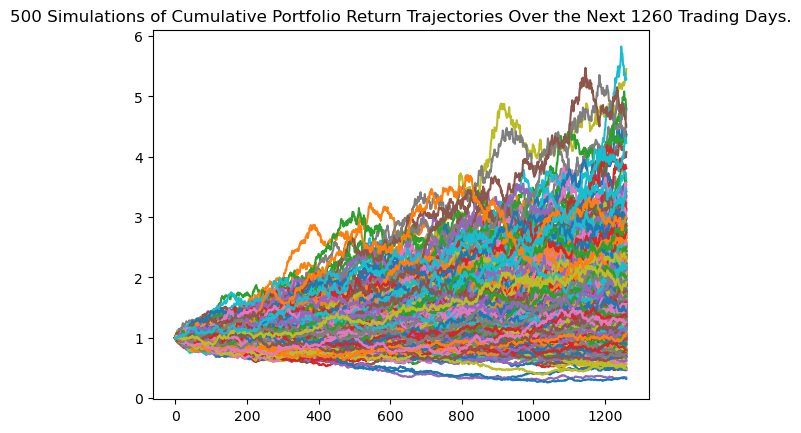

In [56]:
# Plot simulation outcomes
hh_mc_plot = hh_MC_fiveyear.plot_simulation()

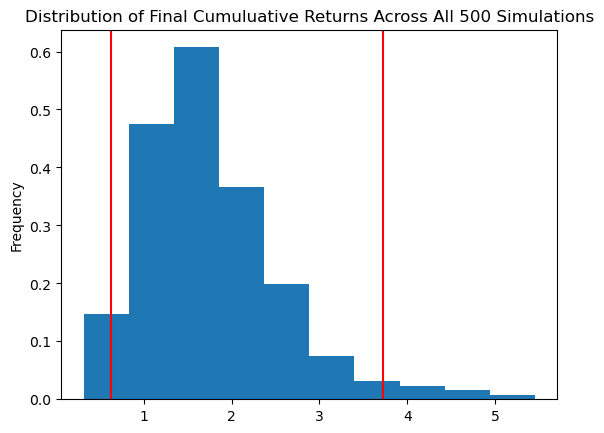

In [57]:
# Plot probability distribution and confidence intervals
dist_plot = hh_MC_fiveyear.plot_distribution()

In [58]:
# Fetch summary statistics from the Monte Carlo simulation results
hh_stat = hh_MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(hh_stat)

count           500.000000
mean              1.763863
std               0.799904
min               0.316663
25%               1.221079
50%               1.607760
75%               2.177339
max               5.453786
95% CI Lower      0.628166
95% CI Upper      3.722608
Name: 1260, dtype: float64


Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $500,000 initial investment.

In [59]:
# Set initial investment
initial_investment = 500000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(hh_stat[8]*initial_investment,2)
ci_upper = round(hh_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $500000 in the portfolio over the next 30 years will end within in the range of $314082.98 and $1861303.98
